In [1]:
import math
import os
import sys
import argparse

import pandas as pd
import numpy as np

sys.path.append('../..')

from src.IO.IO import IO
from src.util import get_config

%matplotlib inline
import matplotlib.pyplot as plt
from src.prg.prg.prg import create_prg_curve, plot_prg, calc_auprg, plot_pr
plt.rcParams['figure.figsize'] = (6,5)

In [2]:
# absolute path to the config folder
path = "../../src/config_files/"
cfg_filename = "config_lbds.yaml"
fn = path + '/' + cfg_filename
if os.path.exists(fn):
    cfg = get_config(fn)
else:
    print("Config file {} couldn't be found at {}, exiting".format(args.configfn, fn))
    exit()

Reading config file


In [3]:
io = IO(cfg, 'pipeline')
ad = cfg["pipeline"]["anomaly_detection"]["anomaly_detector"]

# get filenames
stats_path = io.grid_search_statistics_path
fn = "grid_search_statistics_B2_iforestres.csv"
stats_csv = io.read_csv(fn, io.grid_search_statistics_path)

fns = []
for id in stats_csv['id']:
    fns.append("LBDS_pipeline_2016_B2_iforest_{}.csv".format(id))

Reading grid_search_statistics_B2_iforestres.csv file


In [4]:
f_path = io.get_pipeline_output_path(ad)

dfs = []
for fn in fns:
    dfs.append(io.read_csv(fn, f_path))

Reading LBDS_pipeline_2016_B2_iforest_c9e3f085-ecc5-44d4-b8a0-78d4135b3539.csv file
Reading LBDS_pipeline_2016_B2_iforest_daa3113d-75f1-4cd7-8b70-5babb228e4bb.csv file
Reading LBDS_pipeline_2016_B2_iforest_69e8fdba-ee9a-4b30-a382-ebf461168518.csv file
Reading LBDS_pipeline_2016_B2_iforest_e90a3a95-74e7-4f7f-b667-b7fea58ec5be.csv file
Reading LBDS_pipeline_2016_B2_iforest_9777598b-1d64-466c-acac-3937b3726fa7.csv file
Reading LBDS_pipeline_2016_B2_iforest_91bb9871-7eb9-4f92-a553-6e71bf7f423f.csv file
Reading LBDS_pipeline_2016_B2_iforest_50f6fde4-18ac-4b6f-9d49-ff51472bde0d.csv file
Reading LBDS_pipeline_2016_B2_iforest_0f48bf1a-f546-4cc2-9b20-f5b6f15f61a5.csv file
Reading LBDS_pipeline_2016_B2_iforest_3a5f4711-abbb-4f8e-b8dd-47a1b151cf63.csv file
Reading LBDS_pipeline_2016_B2_iforest_4c75a6eb-c998-401f-87fb-6c9cd8925e9b.csv file
Reading LBDS_pipeline_2016_B2_iforest_64a184c7-75a6-4709-800c-37ff1b00ef50.csv file
Reading LBDS_pipeline_2016_B2_iforest_39074b67-e8f3-4da5-923e-1d6b68de19bb.c

In [5]:
labels_and_scores = []
for i, preds_and_truth_df in enumerate(dfs):
    sorted_df = preds_and_truth_df.sort_values(by="y_pred", ascending=False)
    labels = np.array(sorted_df["y_true"], dtype='int')
    scores = np.array(sorted_df["y_pred"])
    labels_and_scores.append({'labels':labels, 'scores':scores, 'id': stats_csv['id'][i], 'auc': stats_csv['auc'][i], 'auprg': stats_csv['auprg'][i]})

In [6]:
# add position
def get_index_of_first_true(l):
    for i in range(len(l)):
        if int(l[i]) == 1:
            return i
        elif i == len(l):
            print("No one in list")
            return None

for j in range(len(labels_and_scores)):
    labels_and_scores[j]['first_true_position'] = get_index_of_first_true(labels_and_scores[j]['labels'])

In [7]:
# add prg curves

for j in range(len(labels_and_scores)):
    labels_and_scores[j]['prg_curve'] = create_prg_curve(labels_and_scores[j]['labels'], labels_and_scores[j]['scores'])

In [8]:
# add auprg values

for j in range(len(labels_and_scores)):
    labels_and_scores[j]['auprg'] = calc_auprg(labels_and_scores[j]['prg_curve'])

In [9]:
first_true_positions = []
auprgs = []

for l_s in labels_and_scores:
    first_true_positions.append(l_s['first_true_position'])
    auprgs.append(l_s['auprg'])

In [10]:
print(first_true_positions)

[11, 4, 7, 14, 11, 1, 4, 5, 22, 3, 16, 6, 1, 4, 5, 8, 4, 6, 2, 5, 3, 2, 12, 1, 9, 0, 0, 2, 2, 8, 4, 8, 33, 0, 1, 0, 14, 5, 14, 8, 1, 14, 1, 6, 18, 6, 1, 1, 2, 2, 0, 12, 8, 4, 8, 9, 5, 15, 1, 5, 1, 1, 6, 10, 6, 11, 7, 4, 5, 3, 4, 4, 6, 9, 9, 0, 2, 2, 4, 2, 5, 0, 14, 4, 14, 1, 1, 5, 3, 8, 12, 0, 9, 4, 9, 6]


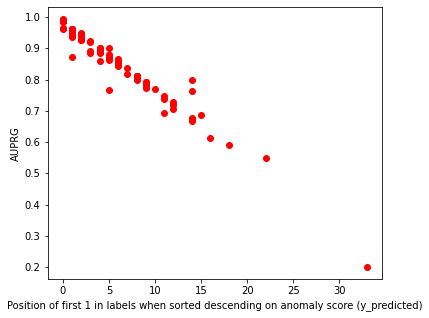

In [11]:
plt.plot(first_true_positions, auprgs, 'ro')
plt.xlabel("Position of first 1 in labels when sorted descending on anomaly score (y_predicted)")
plt.ylabel("AUPRG")
plt.show()

AUPRG:  0.7369885769925214


/home/thomas/Documents/git/anomaly-detection-abt-equipment/notebooks/LBDS/../../src/prg/prg/prg.py:271: RuntimeWarning: invalid value encountered in double_scalars
  return (a[0] - o[0]) * (b[1] - o[1]) - (a[1] - o[1]) * (b[0] - o[0])


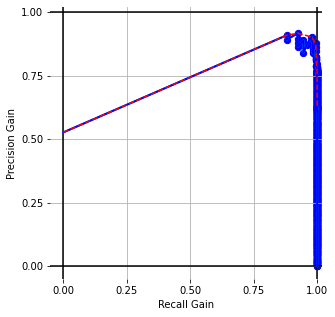

AUPR:  0.0699939106193054


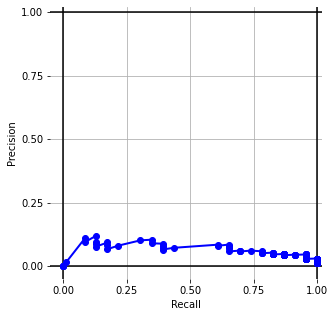

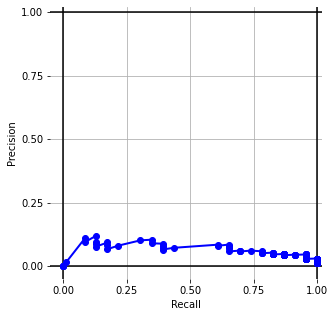

In [12]:
# example prg and pr curve
print("AUPRG: ", labels_and_scores[0]['auprg'])
plot_prg(labels_and_scores[0]['prg_curve'])
print("AUPR: ", labels_and_scores[0]['auc'])
plot_pr(labels_and_scores[0]['prg_curve'])

first TP position index: 0 | id: 66a46329-65fe-4ed6-b1eb-fa6b7add6064
[1 0 0 ... 0 0 0]
AUPRG:  0.9840260737119121


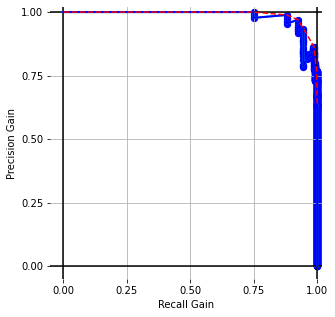

AUPR:  0.1049026856245947


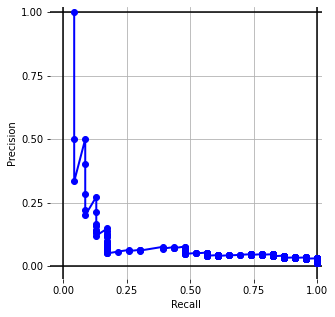

first TP position index: 0 | id: 307fb74a-def5-46ec-b91c-517a95e97d9f
[1 0 0 ... 0 0 0]
AUPRG:  0.9865174912086156


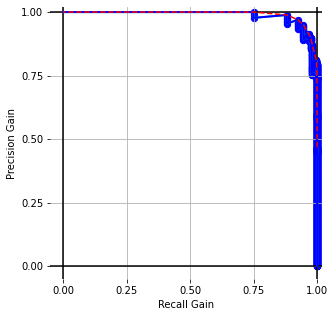

AUPR:  0.113215585301476


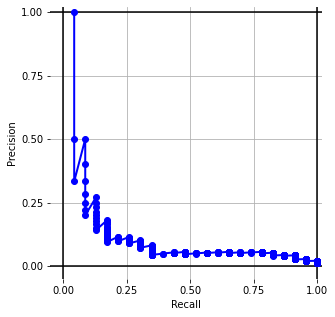

first TP position index: 0 | id: b3f85027-f5e3-402b-b3e3-14730e7b2a90
[1 0 0 ... 0 0 0]
AUPRG:  0.9604537574017694


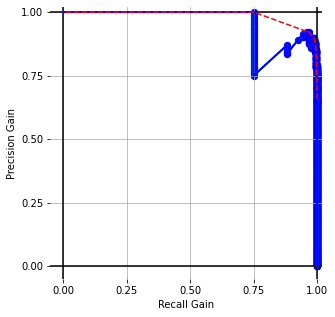

AUPR:  0.09527155689213


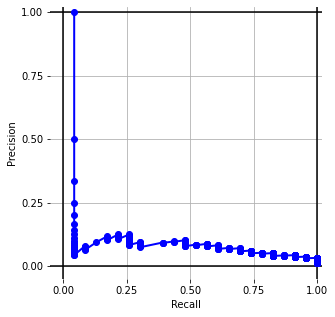

first TP position index: 0 | id: 7656b662-c5e2-4d51-9fd6-efaf30832175
[1 0 0 ... 0 0 0]
AUPRG:  0.9641003764476929


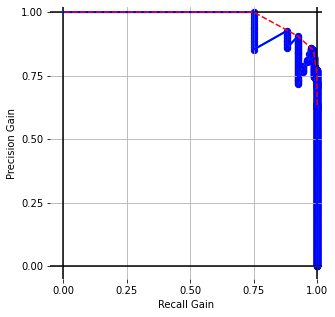

AUPR:  0.0737426975348248


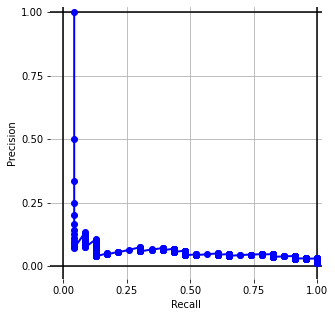

first TP position index: 0 | id: 9525b387-4cd7-4555-adaa-699a2f2263f2
[1 0 0 ... 0 0 0]
AUPRG:  0.9864613940190264


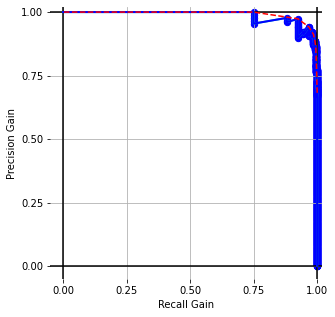

AUPR:  0.1225917393883699


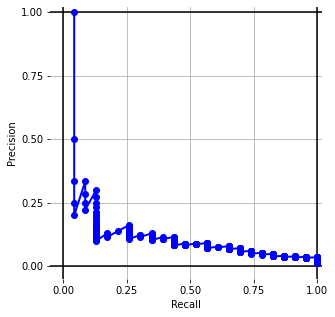

first TP position index: 0 | id: f01a98a4-426f-4b7b-96c9-10195b1f2d18
[1 1 0 ... 0 0 0]
AUPRG:  0.9924587901916032


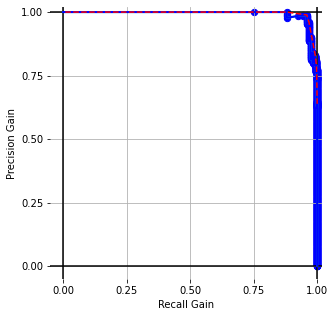

AUPR:  0.1957944025215349


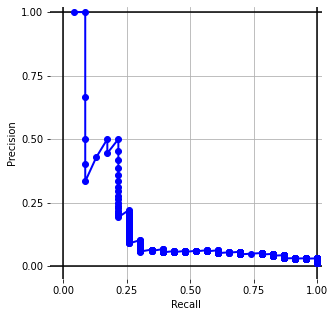

first TP position index: 0 | id: 26924766-fec5-4b7e-9253-c0b3bebff1c3
[1 0 1 ... 0 0 0]
AUPRG:  0.9915932820228011


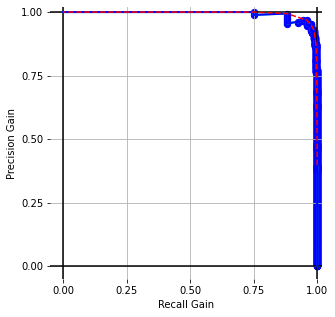

AUPR:  0.1673189657755248


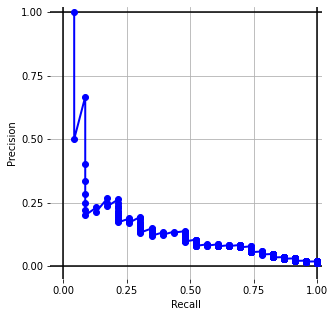

first TP position index: 0 | id: 64caba8b-2b27-46db-b38e-8ae26297a84c
[1 0 0 ... 0 0 0]
AUPRG:  0.9860906018752099


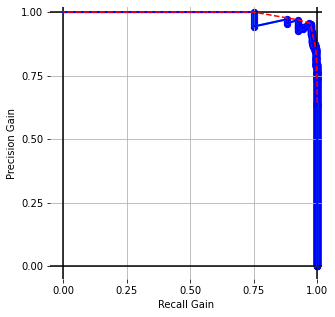

AUPR:  0.1207914627951649


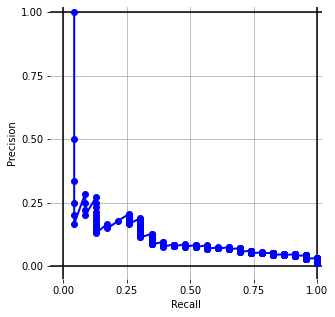

In [13]:
# add position
def get_index_of_first_true(l):
    for i in range(len(l)):
        if int(l[i]) == 1:
            return i
        elif i == len(l):
            print("No one in list")
            return None

# more prg curves

for i in range(len(labels_and_scores)):
    index_of_first_true = get_index_of_first_true(labels_and_scores[i]['labels'])
    if index_of_first_true == 0:
        print("first TP position index: {} | id: {}".format(get_index_of_first_true(labels_and_scores[i]['labels']), labels_and_scores[i]['id']))
        print(labels_and_scores[i]['labels'])
        print("AUPRG: ", labels_and_scores[i]['auprg'])
        plot_prg(labels_and_scores[i]['prg_curve'])
        print("AUPR: ", labels_and_scores[i]['auc'])
        plot_pr(labels_and_scores[i]['prg_curve'])